<a href="https://colab.research.google.com/github/iraidaantropova/ADD/blob/main/ADD_HW2_SinitsaI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск


Домашнее задание:








In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.datasets import make_regression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

*Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. 
Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [3]:
X, y, W_default = make_regression(
    n_features=10,
    bias=3.5,
    noise=1.2,
    coef=True,
    random_state=42
)

In [4]:
W_default #вектор весов данной модели

array([16.74825823, 54.12963353,  5.19712837, 63.64302495, 93.62122462,
       70.64757265, 87.09691237, 10.45678403,  3.15861448, 70.90605195])

In [5]:
y_pred_default = X @ W_default #рассчитываю предсказания данной модели

In [6]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err #считаю MSE

In [7]:
mse_default = calc_mse(y, y_pred_default)
mse_default

14.867688515340433

In [8]:
def my_grad_desc(X, y, alpha=1e-04, verbose=False, tol=0.0): #пробую оптимизировать модель с помощью градиентного спуска
    '''
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default=1e-04
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse

    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаю начальное значение весов
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаю количество итераций
    stop_chek = True  #буду отслеживать снижение ошибки
    errors = []  # добавляю для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        y_pred = W @ X.T
        err = calc_mse(y, y_pred)
        errors.append(err)
        if min_err - err > tol:  # контролирую текущее значение ошибки
            min_err = err
        else:  # если снижение прекратилось, останавливаюсь.
            print(
                f'Stop descent! iteration: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        W -= alpha * (1 / n * 2 * np.sum(X.T * (y_pred - y), axis=1))
        if verbose:
            if n_iter % 100 == 0:
                print(n_iter, W, err)
    return W, min_err, errors

In [9]:
W_1, mse_1, score_1 = my_grad_desc(X, y, alpha=0.001, tol=0.00001)

Stop descent! iteration: 6709, weights: [17.01929729 54.46973397  4.75448857 63.30940302 93.39775624 71.04156752
 86.98609084 10.23663697  3.51134035 70.81187625], mse: 14.301233925406402


In [10]:
def my_sgd(X, y, alpha=1e-04, batch_size=1, n_epoch=1e+06, verbose=False, tol=0.0): #осуществляю SGD
    '''
    :param X: features array
    :param y: target array
    :param alpha: learning rate, float default 1e-04
    :param batch_size: bath_size, int default 1
    :param n_epoh: number of training epochs, int default 1e+06
    :param verbose: prints progress and performance once in a while, bool default False
    :param tol: when mse is not improving by at least tol, the searching stops, float default 0.0
    :return: weights array, mse
    the function stops when the tol or n_epoch parameter is reached
    
    '''
    n = X.shape[0]
    W = np.random.randn(X.shape[1], )  # задаю начальное значение весов
    n_batch = n // batch_size  # определяю количество батчей
    if n % batch_size != 0:
        n_batch += 1
    min_err = float('inf')  #начальное значение ошибки модели - бесконечность
    n_iter = 0  # отслеживаю количество итераций
    stop_chek = True  #буду отслеживать снижение ошибки
    errors = []  # добавляю для визуализации кривой обучения
    while stop_chek:
        n_iter += 1
        for b in range(n_batch):
            start_ = batch_size * b
            end_ = batch_size * (b + 1)
            X_tmp = X.T[:, start_: end_]
            y_tmp = y[start_: end_]
            y_pred = W @ X_tmp
            err = calc_mse(y_tmp, y_pred)
            W -= alpha * (1 / n * 2 * (y_pred - y_tmp) @ X_tmp.T)
        errors.append(err)
        if verbose:
            if n_iter % 1000 == 0:
                print(n_iter, W, err)
        if n_iter==n_epoch:                      # остановка по достижении n_epoch
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        if np.abs(min_err - err) > tol:          # контролирую текущее значение ошибки
            min_err = err if err<=min_err else min_err
        else:                                    # остановка по достижении tol
            print(
                f'Stop descent! n_epoch: {n_iter}, weights: {W}, mse: {min_err}')
            stop_chek = False
        
    return W, min_err, errors

In [11]:
W_2, mse_2, score_2 = my_sgd(X, y, alpha=0.001, batch_size=1, n_epoch=8000, tol=0.00001)

Stop descent! n_epoch: 5485, weights: [17.03816167 54.52489416  4.67919921 63.30903778 93.32434146 71.13538947
 86.88484244 10.12434568  3.54190911 70.68419134], mse: 10.993523580510427


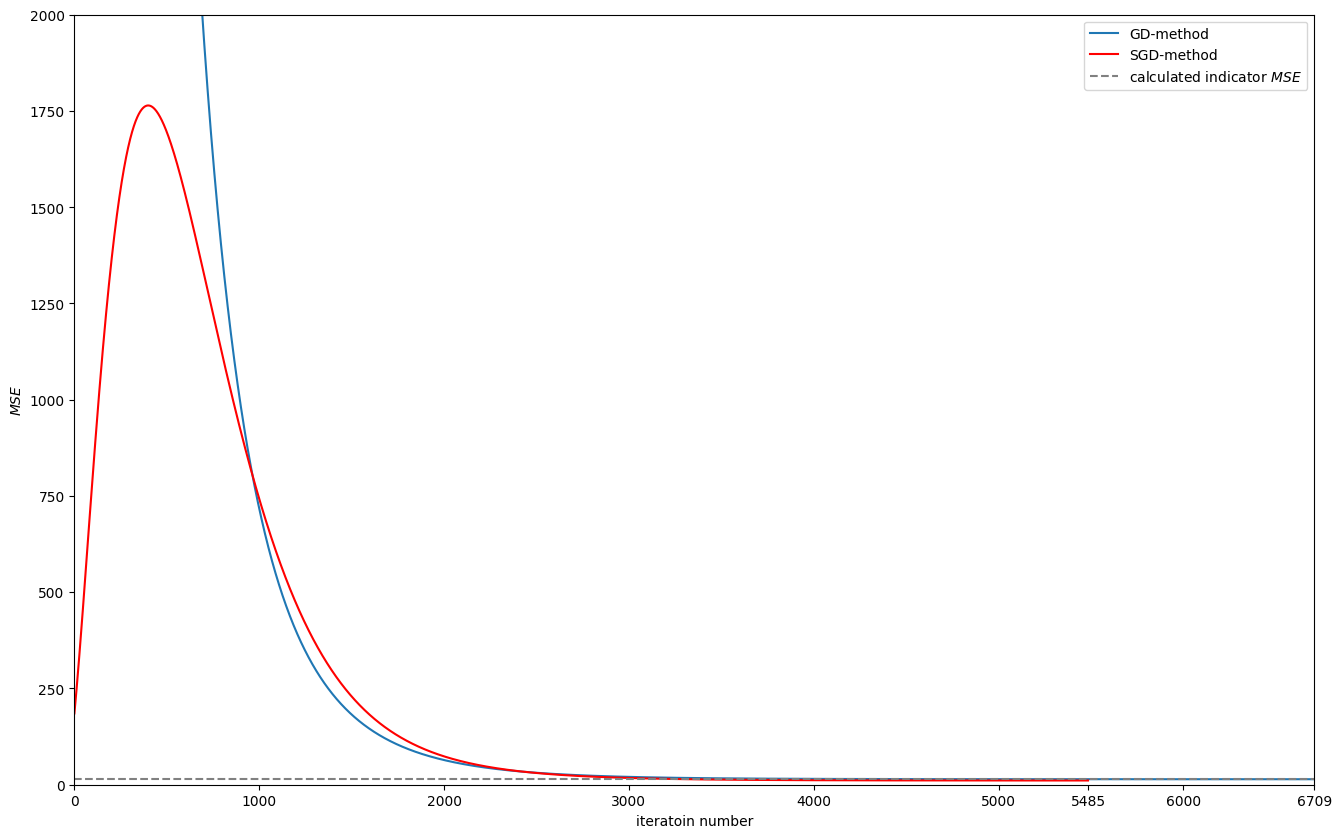

In [12]:
plt.figure(figsize=(16, 10))
plt.ylim((0,2000))
plt.xlim((0,len(score_1)-1000))
plt.plot([x for x in range(len(score_1))], score_1, label='GD-method')
plt.plot([x for x in range(len(score_2))], score_2, c='r', label='SGD-method')
plt.axhline(mse_default, c='gray', ls='--', label=r'calculated indicator $MSE$', mew=0.9)
plt.xlabel('iteratoin number')
plt.xticks(list(plt.xticks()[0])+[len(score_1), len(score_2)])
plt.ylabel(r'$MSE$')
plt.legend()
plt.show()

In [13]:
len(score_1)

6709

На основании графиков можно сделать вывод что примерно до 800-й итерации SGD
 'расходился'(значение mse росло), затем, до уроня 2300-2400 итераций оба алгоритма сходились, при этом скорость схождения GD была выше, чем у SGD. Однако затем скорости уравнялись, и SGD сошелся раньше чем GD.

1  Используя файл Lesson_2_extended.ipynb (он в web2.zip в материалах)::


Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации

__Задача:__ предсказание баллов ЕГЭ ученика

In [14]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [15]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [16]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [17]:
X_st = X.copy().astype(np.float64)
X_st[:, 1:4] = standard_scale(X_st[:, 1:4])
X_st

array([[ 1.        , -0.60601512,  0.32283164, -0.60601512],
       [ 1.        , -0.60601512,  0.69511491, -0.60601512],
       [ 1.        , -0.6041537 ,  0.78818573, -0.6041537 ],
       [ 1.        , -0.59856945,  0.50897328, -0.60601512],
       [ 1.        , -0.60229229,  2.09117718, -0.6041537 ],
       [ 1.        , -0.60787654,  0.88125655, -0.60601512],
       [ 1.        , -0.59856945,  2.184248  , -0.60229229],
       [ 1.        , -0.58926237,  3.11495618, -0.60229229],
       [ 1.        , -0.60601512,  0.22976083, -0.60601512],
       [ 1.        , -0.6041537 ,  1.25353982, -0.6041537 ]])

In [18]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [22]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [23]:
gradient_descent(X_st, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 1.65427364 -1.82806363  0.72268371 -1.70638415], error 3270.851950271919
Iter: 500, weights: [ 23.84985914 -15.12947608  11.86038746 -15.12867985], error 51.77169052626183
Iter: 1000, weights: [ 24.07631089 -15.1294451   11.67026832 -15.24416184], error 51.73298208672437
Iter: 1500, weights: [ 24.13581843 -15.02710168  11.66611346 -15.25813446], error 51.73012948215379
Iter: 2000, weights: [ 24.19207031 -14.92277396  11.6655809  -15.27012766], error 51.72729094524448
Iter: 2500, weights: [ 24.24825491 -14.81841616  11.66511894 -15.28208011], error 51.72445287747517
Iter: 3000, weights: [ 24.30443432 -14.71406632  11.66465838 -15.29402956], error 51.72161527360906
Iter: 3500, weights: [ 24.36060977 -14.60972521  11.66419789 -15.30597676], error 51.71877813356682
Iter: 4000, weights: [ 24.41678126 -14.50539282  11.66373744 -15.31792172], error 51.71594145727096
Iter: 4500, weights: [ 24.47294881 -14.40106916  11.66327702 -15.32986444], error 51.713105244644034
Final M

array([ 24.52900009, -14.29696285,  11.66281756, -15.34178105])

In [19]:
np.sign(0)

0

In [20]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * np.sign(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [21]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [ 1.04361521 -0.05304362  2.45534542 -2.12489063], error 3154.720763867568
Iter: 500, weights: [ 24.0479035  -13.83412494  11.8835614  -16.02032371], error 51.752169573847446
Iter: 1000, weights: [ 24.3096332  -13.83594419  11.6694354  -16.1374834 ], error 51.70133453811263
Iter: 1500, weights: [ 24.38334703 -13.72253699  11.66474609 -16.14032128], error 51.69807573580762
Iter: 2000, weights: [ 24.45339432 -13.60689488  11.66413628 -16.14092998], error 51.69487559206632
Iter: 2500, weights: [ 24.52336587 -13.49121873  11.66360597 -16.14149285], error 51.69167679408432
Iter: 3000, weights: [ 24.59333163 -13.37555142  11.66307725 -16.14205244], error 51.68847855483193
Iter: 3500, weights: [ 24.66329295 -13.25989378  11.6625486  -16.14260956], error 51.68528085901305
Iter: 4000, weights: [ 24.73324988 -13.14424583  11.66201999 -16.14316424], error 51.6820837062386
Iter: 4500, weights: [ 24.8032024  -13.02860755  11.66149142 -16.14371648], error 51.678887096409916
Final M

array([ 24.87301062, -12.91321021,  11.66096396, -16.14426517])